### Importing Required libraries

In [1]:
# Loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset and Basic Understanding 

In [2]:
# Loading Dataset
df = pd.read_csv("Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# Understanding dataset
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,satisfaction,object,2,0
1,Gender,object,2,0
2,Customer Type,object,2,0
3,Age,int64,75,0
4,Type of Travel,object,2,0
5,Class,object,3,0
6,Flight Distance,int64,5398,0
7,Seat comfort,int64,6,0
8,Departure/Arrival time convenient,int64,6,0
9,Food and drink,int64,6,0


### Inference
- There are 5 categorical variables: satisfaction, Gender, Customer Type, Type of Travel and Class
- There are variables with high unique values and some missing values: we drop them

In [4]:
df=df.drop(columns=["Flight Distance", "Arrival Delay in Minutes", "Departure Delay in Minutes"])
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [5]:
# Plotting variables
def continuous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="satisfaction",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by satisfaction Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(df["satisfaction"],df[column],palette="Set2")
    plt.title(f"Distribution of {column} by satisfaction Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


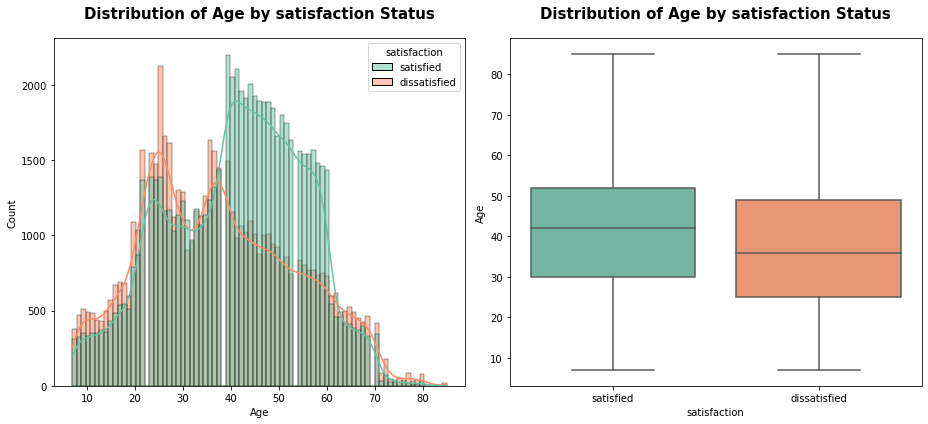

In [6]:
for col in df[['Age']]:
    continuous_plot(col)

### Binning 'AGE' Variable

In [7]:
# Creating Age bins
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [8]:
age_bins = [0, 30, 40, 50, 60, 70, np.inf]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=labels)
# age_bins = [0, 25, 35, 50, 75, 100]
# df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)
cross_table01 = pd.crosstab(df['Age'], df['satisfaction'])
print(cross_table01)

satisfaction  dissatisfied  satisfied
Age                                  
<30                  22729      18151
30-40                12697      13695
40-50                 9922      19084
50-60                 7793      15755
60-70                 4974       4116
70+                    678        286


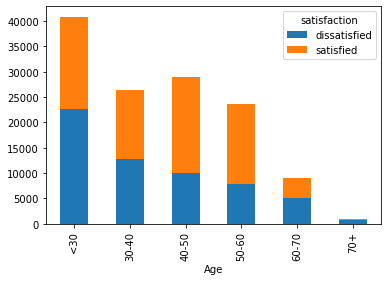

In [9]:
# Creating barplot
pl = cross_table01.plot(kind="bar", stacked=True)

In [10]:
df['Age'].value_counts()

<30      40880
40-50    29006
30-40    26392
50-60    23548
60-70     9090
70+        964
Name: Age, dtype: int64

In [11]:
# Encoding categorical Variables for further analysis
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['satisfaction']= label_encoder.fit_transform(df['satisfaction'])
df['Gender']= label_encoder.fit_transform(df['Gender'])  
df['Customer Type']= label_encoder.fit_transform(df['Customer Type'])  
df['Type of Travel']= label_encoder.fit_transform(df['Type of Travel'])  
df['Class']= label_encoder.fit_transform(df['Class']) 
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,0,0,60-70,1,1,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,1,1,0,40-50,1,0,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,1,0,0,<30,1,1,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,1,0,0,50-60,1,1,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,1,0,0,60-70,1,1,0,0,0,3,4,3,4,2,2,0,2,4,2,5


categorical variables in df is encoded:
- satisfaction column: 0 is dissatisfied and 1 is satisfied
- gender column: 0 is female and 1 is male
- customer type: 0 is Loyal cutomer and 1 is disloyal
- Type of Travel: 0 is Business travel and 1 is Personal Travel
- Class column: 0 is business, 1 is eco and 2 is eco plus

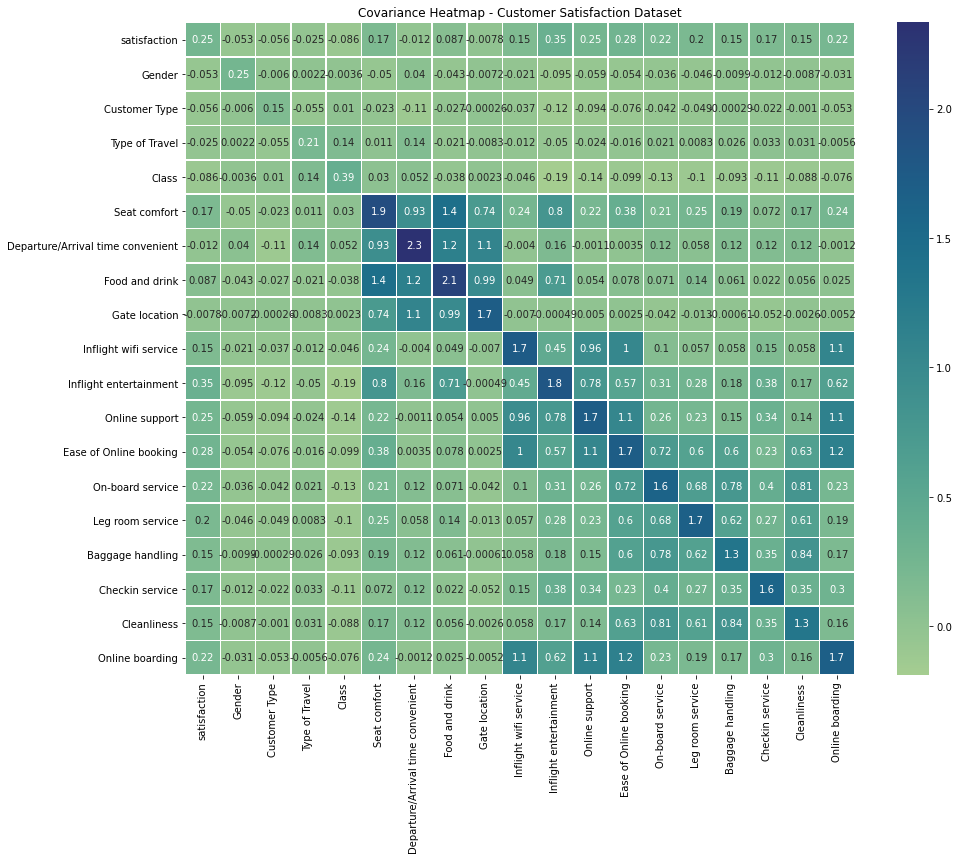

In [12]:
# creating covariance matrix and heatmap to understand relationship among variables
cov_matrix = pd.DataFrame.cov(df)
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Covariance Heatmap - Customer Satisfaction Dataset')
plt.show()

In the above context, using correlation would likely be more appropriate than covariance. 
- Correlation not only indicates the direction of the linear relationship between variables (positive or negative) but also provides information about the strength of the relationship. This is important for understanding the magnitude of the effect.
- Correlation is a standardized measure that ranges from -1 to 1, making it easier to interpret and compare across different variables. Covariance, on the other hand, is not normalized and can vary greatly depending on the scales of the variables.

In [13]:
# Checking if variables are independent

from sklearn.feature_selection import chi2
X=df.drop(columns=['satisfaction', 'Age'])
Y=df['satisfaction']

In [14]:
chi_scores=chi2(X,Y)
chi_scores

(array([2.96836192e+03, 9.08324479e+03, 1.07031561e+03, 6.56994767e+03,
        5.21598579e+03, 2.43562124e+01, 1.38231979e+03, 1.07931376e+01,
        3.58450862e+03, 1.90603507e+04, 9.58754495e+03, 1.18863699e+04,
        7.50249807e+03, 5.78487373e+03, 3.18587187e+03, 4.37700147e+03,
        3.12680115e+03, 7.47131446e+03]),
 array([0.00000000e+000, 0.00000000e+000, 9.34755575e-235, 0.00000000e+000,
        0.00000000e+000, 8.00681112e-007, 1.46013588e-302, 1.01877058e-003,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]))

<AxesSubplot:>

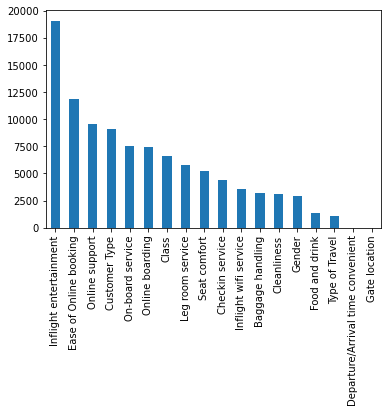

In [15]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

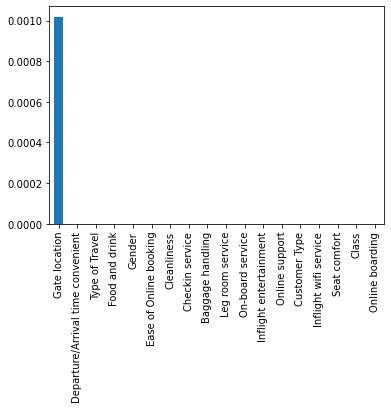

In [16]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

- the variables with the highest chi-square scores are strongly associated with customer satisfaction. This means that these factors likely play a significant role in influencing customers' satisfaction levels with the airline's services. 
- The top 3 variables are 'Inflight entertainment', 'Ease of online booking', and 'Online Support'

### t-test

In [17]:
#importing library for t-test
from scipy.stats import ttest_1samp

In [18]:
# perform one sample t-test


# Bin midpoints representing age bins
bin_midpoints = np.array([25, 35, 45, 55, 65, 75])  # Example bin midpoints

# Hypothesized population mean age (e.g., 40)
hypothesized_mean_age = 40

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(bin_midpoints, hypothesized_mean_age)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check for statistical significance (typical significance level of 0.05)
if p_value < 0.05:
    print("Reject null hypothesis: The sample mean age is significantly different.")
else:
    print("Fail to reject null hypothesis: The sample mean age is not significantly different.")

T-Statistic: 1.3093073414159544
P-Value: 0.2473666070277848
Fail to reject null hypothesis: The sample mean age is not significantly different.


- Binning introduces discretization, which can potentially lead to loss of information. 
- This would work when we have a relatively large sample size and the bin midpoints accurately represent the underlying age distribution. However, when trying to preserve the continuous nature of the age variable, using non-parametric tests or regression techniques will be better as they work with continuous data directly.